In [4]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import _pickle as pickle
import seaborn
import re

In [77]:
#characters

labels = ['A', 'n', 'a', 'r', 'c', 'h', 'i', 's', 'm', 'space', '\n', 'p', 'o', 'l', 't', 'y', 'd', 'v', 'e', 'f', '-', 'g', 'u', ',', 'b', '.', 'W', 'w', 'x', 'T', 'S', 'M', '(', ')', 'N', 'R', 'U', 'k', 'F', 'B', 'E', '`', "'", 'G', ';', 'ἀ', 'ν', 'ē', 'ί', 'ζ', 'ε', 'ι', 'z', '1', '5', '3', '9', 'P', 'J', '8', '0', 'O', 'H', '6', 'C', 'L', 'Z', 'j', 'D', '\xa0', 'I', 'K', 'q', 'É', 'é', 'V', '7', '4', '2', '’', '‘', '?', 'ó', 'ñ', '´', '“', '”', '–', 'Y', ':', 'î', 'ü', '%', 'á', '<', '/', '>', 'í', 'à', '—', 'X', 'Q', '$', 'α', 'ὐ', 'τ', 'ό', 'ς', '°', '−', 'θ', '_', '+', 'ɑ', 'Á', 'è', 'ú', '&', 'κ', 'λ', 'έ', 'ο', 'Ἀ', 'χ', '²', 'ş', 'Γ', 'σ', 'ύ', 'ρ', 'Α', '[', ']', '!', '#', 'æ', 'ō', '×', 'ò', '=', 'ā', 'ī', 'ı', 'ö', 'ï', 'ⴷ', 'ⵣ', 'ⴰ', 'ⵢ', 'ⴻ', 'ⵔ', 'ɣ', 'ا', 'ل', 'ج', 'ز', 'ئ', 'ر', 'ب', 'ن', 'ي', 'م', 'غ', 'ة', 'ū', 'Ā', '€', 'â', 'ł', 'γ', 'η', 'μ', 'υ', 'Χ', 'ك', 'ء', 'ح', 'ę', 'ś', 'Ś', 'ṇ', '*', '½', '¼', '¢', '^', '~', '\\', '|', '@', 'À', '£', '␠', '␢', '␣', 'ß', 'Ł', '¥', '{', '}', 'π', 'ω', 'ἰ', 'ή', 'Δ', 'δ', 'Π', 'ώ', 'φ', 'ë', 'ὸ', 'ά', 'ý', 'š', 'ć', 'ă', 'ʔ', 'ḳ', 'ʷ', 'ʕ', 'ŝ', 'ç', 'Σ', 'β', '‐', 'А', 'л', 'я', 'с', 'к', 'а', 'µ', 'ῦ', 'פ', 'ו', 'ך', 'ƒ', 'Ψ', '⅓', '≈', '³', '→', 'ἄ', 'ξ', 'ʾ', 'א', 'ב', 'ק', '算', '盤', 'ṣ', 'ṅ', '주', '판', '수', '산', 'ч', 'ё', 'т', 'ы', 'ø', '±', 'о', 'м', 'н', 'в', 'ǔ', '·', 'Ȣ', 'þ', 'ð', 'ㄌ', 'ㄨ', 'ㄢ', 'е', 'ю', 'अ', 'ʻ', 'č', 'Հ', 'ա', 'յ', 'ո', 'ց', 'գ', 'ր', 'ե', 'բ', 'ւ', 'ն', 'օ', 'ֆ', 'և', 'Ե', 'Վ', 'Ւ', 'Ո', 'ɛ', 'Ա', 'Բ', 'ô', 'ä', 'å', 'Ħ', 'ɪ', 'ː', '№', 'П', 'р', 'й', 'Д', 'ь', '′', 'ط', 'و', 'ţ', 'ŭ', 'ّ', 'Ō', 'ὶ', 'ã', 'Š', 'Č', 'İ', 'ġ', '\xad', 'Ē', 'ḥ', 'إ', 'ش', 'ه', 'Ü', 'ğ', 'ə', '\u2009', '†', '←', '≥', '≤', '\u202f', '…', 'ê', '①', '⑤', '☉', 'ア', 'ニ', 'メ', 'ー', 'シ', 'ョ', 'ン', 'Ç', 'û', 'Ἄ', 'Ş', 'ʼ', '↔', 'ǝ', 'ž', '¹', 'タ', 'リ', 'ク', 'チ', 'ヒ', '二', '中', '歴', 'Ö', 'Ž', 'ľ', 'ř', '∈', '¬', 'Б', 'ù', 'Τ', 'Ί', 'Μ', 'ὰ', 'ḗ', 'آ', 'پ', 'س', 'ń', 'Ė', 'አ', 'ቡ', 'ጊ', 'ዳ', 'क', 'ि', 'ु', 'े', 'ो', '्', 'र', 'ट', 'ल', 'ሀ', 'ሁ', 'ሂ', 'ህ', 'ᐱ', 'ᐳ', 'ᐸ', 'ᑎ', 'ᑐ', 'ᑕ', 'か', 'き', 'く', 'け', 'こ', 'ら', 'り', 'る', 'れ', 'ろ', 'ᗅ', 'ᗺ', 'ᗷ', '®', 'Ä', 'ع', 'Å', 'ܠ', 'ܐ', 'ܙ', 'ܦ', 'ܢ', 'ܝ', 'د', 'ت', 'ث', 'ħ', '⁄', 'Ø', 'Ᾱ', 'ᾱ', 'Ᾰ', 'ᾰ', 'ἁ', '∝', 'ظ', '⅛', 'Î', 'О', 'г', 'и', 'з', 'ц', 'К', 'п', 'Т', 'ш', 'д', 'ʿ', 'Ḥ', 'Ẓ', 'ṭ', 'ق', 'ᾶ', 'ܒ', 'च', 'ा', 'व', 'ế', 'ẽ', '§', '‹', '›', '国', '際', '連', '合', '略', '語', 'ě', '北', '大', '京', '学', '東', '⊆', '∴', 'Â', 'म', 'त', 'ष', 'ἡ', 'ῃ', '農', '家', '农', '許', '行', 'œ', '∠', 'Θ', 'Φ', 'ψ', '″', 'Æ', 'Λ', 'ϊ', 'ḍ', '讖', '緯', 'UNK']
labels_rel = [lab for lab in labels if re.search("[[a-z]|[0-9]|[A-Z]|\[\]?\:.,!%();\"\']", lab)]
#labels_rel.append('space')
#
data = np.load('cv/charrnn_1.59.chainermodelnew_FILES/embed_enc/W.npy')
rel_indeces = []
for i,lab in enumerate(labels):
    if lab in labels_rel:
        rel_indeces.append(i)

In [82]:
dis = 0
import string
pairs = [(x,y) for x in string.ascii_lowercase for y in ['space']]
for pair in pairs:
    dis+=cosine_similarity(data[labels.index(pair[0])].reshape(1, -1),data[labels.index(pair[1])].reshape(1, -1))
dis/len(pairs)

array([[-0.0231232]], dtype=float32)

In [76]:
min_dist = {}
closest = {}
total = []
for lab,emb in zip(labels_rel,data[[rel_indeces]]):
    min_dist[lab]=[0]
    for lab2,emb2 in zip(labels_rel,data[[rel_indeces]]):
        if lab != lab2 and cosine_similarity(emb.reshape(1, -1),emb2.reshape(1, -1))[0] > min_dist[lab][0]:
            closest[lab] = lab2
            min_dist[lab] = cosine_similarity(emb.reshape(1, -1),emb2.reshape(1, -1))
        
    print(lab, closest[lab], min_dist[lab])
    total.append(min_dist[lab])
print(np.mean(total))

A D [[ 0.19515921]]
n N [[ 0.1658363]]
a A [[ 0.13301514]]
r R [[ 0.19304615]]
c C [[ 0.24387306]]
h H [[ 0.22590169]]
i I [[ 0.1528407]]
s S [[ 0.15581736]]
m M [[ 0.2785852]]
space A [[ 0.13242003]]
p P [[ 0.19899005]]
o O [[ 0.16326879]]
l L [[ 0.17740342]]
t T [[ 0.23259526]]
y w [[ 0.11143488]]
d D [[ 0.2487516]]
v V [[ 0.30576795]]
e E [[ 0.10344794]]
f F [[ 0.33060712]]
g G [[ 0.11120977]]
u ] [[ 0.0897316]]
, ; [[ 0.51573783]]
b 9 [[ 0.1231226]]
. ? [[ 0.44169879]]
W w [[ 0.2389082]]
w W [[ 0.2389082]]
x X [[ 0.13403879]]
T t [[ 0.23259526]]
S Z [[ 0.22923192]]
M m [[ 0.2785852]]
( , [[ 0.34486866]]
) ] [[ 0.40286392]]
N L [[ 0.21493576]]
R r [[ 0.19304615]]
U Q [[ 0.18539537]]
k H [[ 0.15482233]]
F f [[ 0.33060712]]
B O [[ 0.23196805]]
E A [[ 0.16046689]]
' ) [[ 0.28492898]]
G B [[ 0.18242919]]
; , [[ 0.51573783]]
z X [[ 0.19183132]]
1 3 [[ 0.64264864]]
5 6 [[ 0.88077879]]
3 4 [[ 0.8577264]]
9 8 [[ 0.87925881]]
P V [[ 0.22850096]]
J Q [[ 0.18724826]]
8 9 [[ 0.87925881]]
0 5 [[

2.0343921184539795


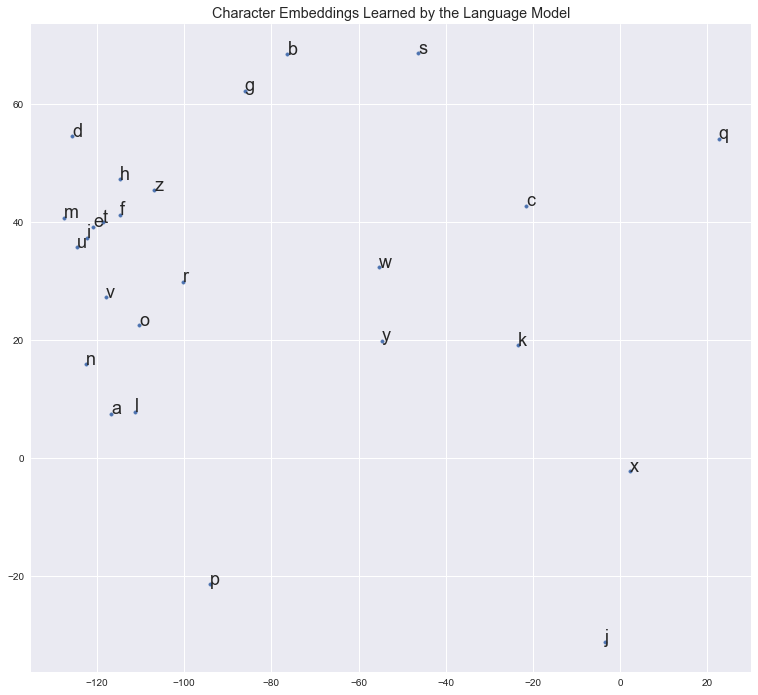

In [54]:
#characters

model = TSNE(n_components=2, perplexity=5)#, early_exaggeration=4.0, learning_rate=1000.0, n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=0, method='barnes_hut', angle=0.5)
#np.set_printoptions(suppress=True)
Y = model.fit_transform(data)
Y_rel = Y[[rel_indeces]]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(frameon=True)
#plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
#plt.ylim([-0.00025,0.00025])
#plt.xlim([-0.0005, 0.0005])
for i, txt in enumerate(labels_rel):
    ax.annotate(txt, (Y_rel[:, 0][i],Y_rel[:, 1][i]),fontsize=18)
plt.scatter(Y_rel[:, 0], Y_rel[:, 1],marker=".")
plt.title('Character Embeddings Learned by the Language Model', fontsize='large')
print(model.kl_divergence_)
plt.show()
fig.savefig('char_emb3.png')


In [17]:
words = pickle.load(open('/afs/inf.ed.ac.uk/user/s12/s1233656/chainer3/LM/embeddings', 'rb'))

labels_all = open('/afs/inf.ed.ac.uk/user/s12/s1233656/chainer3/LM/label_embeddings', 'r').read().split()
words_list = [words[key][0] for key in labels_all if key in words.keys()]
labels_rel = open('/afs/inf.ed.ac.uk/user/s12/s1233656/chainer3/LM/label_embeddings500-450', 'r').read().split()

FileNotFoundError: [Errno 2] No such file or directory: '/afs/inf.ed.ac.uk/user/s12/s1233656/chainer3/LM/embeddings'

In [82]:
rel_indeces = []
for i,lab in enumerate(labels_all):
    if lab in labels_rel:
        rel_indeces.append(i)

0.6508694887161255


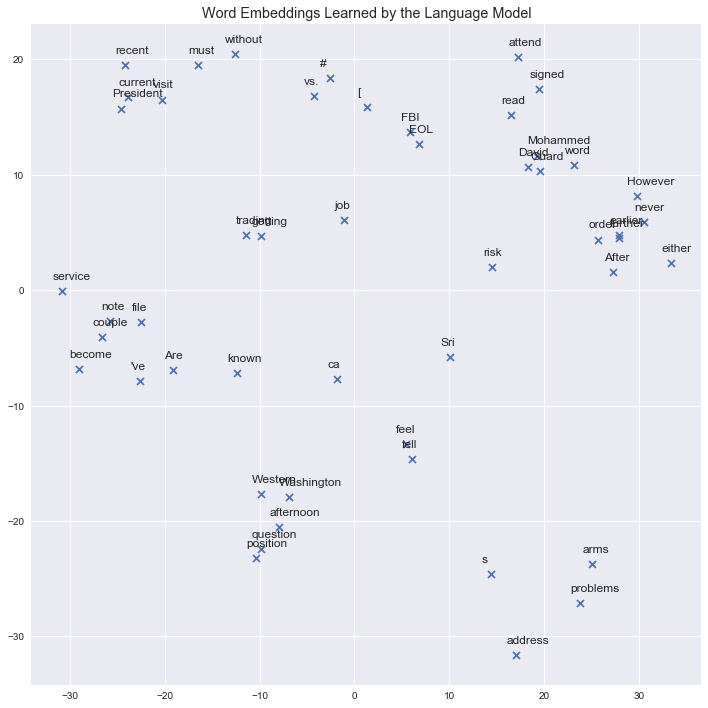

In [93]:
model = TSNE(n_components=2, perplexity=50, early_exaggeration=4.0, learning_rate=1800.0, n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, metric='cosine')
#np.set_printoptions(suppress=True)
Y = model.fit_transform(words_list)
Y_rel = Y[[rel_indeces]]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(frameon=True)
#plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)

for i, txt in enumerate(labels_rel):
    ax.annotate(txt, (Y_rel[:, 0][i],Y_rel[:, 1][i]),fontsize=12)
plt.scatter(Y_rel[:, 0]+1, Y_rel[:, 1]-1,marker="x")
plt.title('Word Embeddings Learned by the Language Model', fontsize='large')
print(model.kl_divergence_)
plt.tight_layout()
plt.show()